In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# reference data

In [3]:
ref = pd.read_csv("reference_labels", delimiter="\t")

In [4]:
ref["SID"] = "0_" + ref["SGDP_ID"]

In [5]:
tG = ref[ref["Population_ID"].isin(["UtahEuropean", "Yoruba", "Maya", "Mayan", "Mixtec"])]

In [6]:
tG["SID"] = "0_" + tG["SGDP_ID"]
tG["FID"] = 0

In [7]:
tG[["FID", "SID"]].to_csv("1000g_admixture_fam.txt", sep="\t", index=False, header=None)

In [8]:
tG[["SID", "Region"]].to_csv("1000g_admixture_key.txt", sep="\t", index=False, header=None)

# pop file 

In [13]:
fam = pd.read_csv("/opt/genomics/IPHinvestigators/ccaggiano/admixture_output/1000g.fam", delimiter="\t", header=None)

In [14]:
fam = fam.merge(tG, left_on=1, right_on="SID")

In [15]:
fam["Population_ID_redone"] = fam["Population_ID"].replace({"MexicanAmerican":"-", "AfricanAmericans":"-"})

In [16]:
fam["Population_ID_redone"].to_csv("/opt/genomics/IPHinvestigators/ccaggiano/admixture_output/1000g_pruned.pop", sep="\t", header=None, index=False)

In [18]:
fam["Population_ID_redone"].unique()

array(['UtahEuropean', 'Yoruba', 'Maya'], dtype=object)

# admixture Q mixtures 

In [15]:
q = pd.read_csv("1000g_pruned.3.Q", delimiter=" ", header=None)
q = fam[["SGDP_ID", "Population_ID", "Region"]].join(q)

# distribution plots

In [16]:
pop = "AfricanAmericans"
pop_q = q[q["Population_ID"] == pop]

In [17]:
pop_q = pop_q.sort_values(by=0, ascending=False)

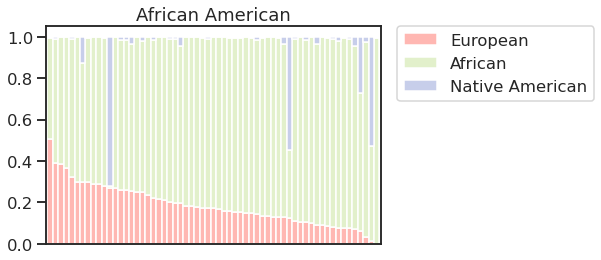

In [18]:
colors = ["#FFB7B2", "#E2F0CB", "#C7CEEA"]
pop_q[[0, 1, 2]].plot.bar(stacked=True, width=1.0, color=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           labels=["European", "African", "Native American"])
plt.xticks([], [])
plt.title("African American")
plt.show()

# atlas clusters

In [12]:
fam = pd.read_csv("/opt/genomics/IPHinvestigators/ccaggiano/previous_reference/all.fam", delimiter=" ", header=None)

In [13]:
cluster6 = pd.read_csv("cluster6_subclusters.csv")

In [14]:
keep = list(ref[ref["Population_ID"].isin(["UtahEuropean", "Yoruba", "Maya"])]["SID"])

In [15]:
atlas = list(cluster6[cluster6["Region"].isnull()]["sample_id"])
keep += list(atlas)

In [16]:
fam_clust6 = fam[fam[1].isin(keep)]

In [17]:
fam_clust6[[0, 1]].to_csv("/opt/genomics/IPHinvestigators/ccaggiano/admixture_output/clust6_fam.txt",
                         sep="\t", header=None, index=False)

In [18]:
pop = fam_clust6.merge(ref, left_on=1, right_on="SID", how="left")

In [22]:
pop["PopID"].value_counts()

-               34878
Yoruba            129
UtahEuropean       99
Maya               19
Name: PopID, dtype: int64

In [23]:
pop["PopID"] = pop["Population_ID"].replace({np.nan:"-"})
pop["PopID"].to_csv("/opt/genomics/IPHinvestigators/ccaggiano/admixture_output/clust6_pruned.pop", sep="\t", header=None, index=False)

## q file

In [62]:
clust_6_q = pd.read_csv("clust6_pruned.3.Q", delimiter=" ", header=None)
clust_6_q.columns = ["african", "native american", "european"]

In [63]:
clust_6_q = pop.join(clust_6_q)
clust_6_q = clust_6_q.merge(cluster6, left_on=1, right_on="sample_id")

In [48]:
cluster = 6
clust = clust_6_q[clust_6_q["cluster"] == cluster][["european", "african", "native american"]]
clust_sample = clust.sample(n=200, random_state=1)

In [49]:
clust_sample = clust_sample.sort_values(by="native american", ascending=False)

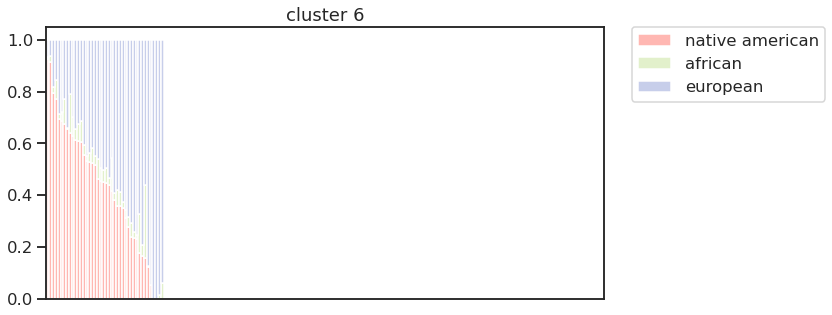

In [51]:
colors = ["#FFB7B2", "#E2F0CB", "#C7CEEA"]

clust_sample[["native american", "african", "european"]].plot.bar(stacked=True, width=1.0, figsize=(10,5), color=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks([], [])
plt.title(f"cluster {cluster}")
plt.show()

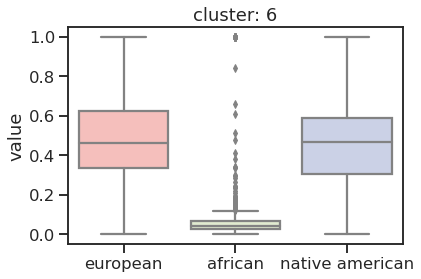

In [52]:
sns.boxplot(x="variable", y="value", data=clust.melt(), palette=colors)
plt.title(f"cluster: {cluster}")
plt.xlabel("")
plt.show()

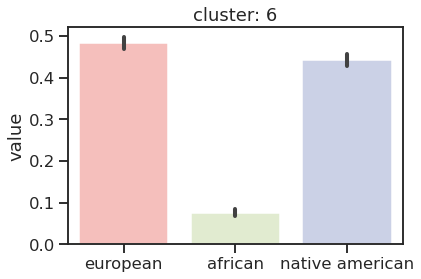

In [53]:
sns.barplot(x="variable", y="value", data=clust.melt(), palette=colors)
plt.title(f"cluster: {cluster}")
plt.xlabel("")
plt.show()

In [67]:
all_clust = clust_6_q[["european", "african", "native american", "cluster"]].melt(id_vars=["cluster"])

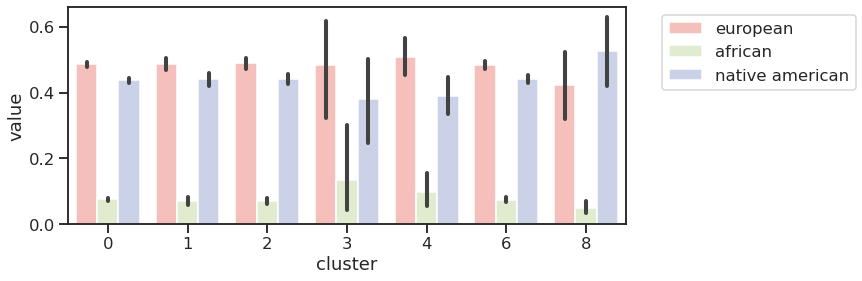

In [70]:
plt.figure(figsize=(10, 4))
sns.barplot(x="cluster", y="value", data=all_clust, hue="variable", palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

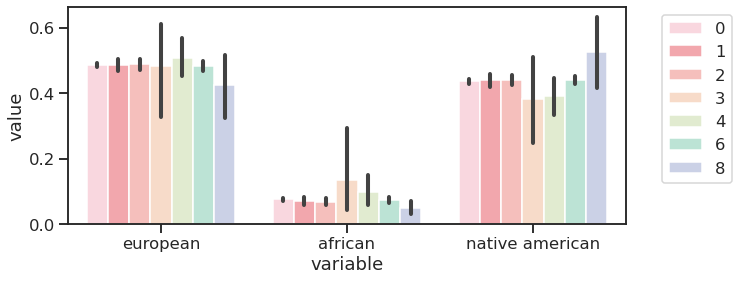

In [71]:
colors = ["#ffd1dc", "#FF9AA2", "#FFB7B2", "#FFDAC1", "#E2F0CB", "#B5EAD7", "#C7CEEA", "#b19cd9"]
plt.figure(figsize=(10, 4))
sns.barplot(x="variable", y="value", data=all_clust, hue="cluster", palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()